### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [27]:
df=pd.read_csv('amz_uk_price_prediction_dataset.csv')

In [57]:
# Generating a crosstab 
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

# Ensure correct reference to 0 and 1 (check if they exist)
if False in crosstab_result.columns and True in crosstab_result.columns:
    crosstab_result['BestSeller_Proportion'] = crosstab_result[True] / (crosstab_result[True] + crosstab_result[False])
else:
    print("Error: Unexpected column names in crosstab result. Check data types.")

crosstab_result

isBestSeller,False,True,BestSeller_Proportion
category,,,
3D Printers,247,1,0.004032
3D Printing & Scanning,4065,2,0.000492
Abrasive & Finishing Products,245,5,0.020000
Action Cameras,1696,1,0.000589
Adapters,251,3,0.011811
...,...,...,...
Wind Instruments,243,7,0.028000
Window Treatments,234,5,0.020921
Women,17559,213,0.011985


In [43]:
import pandas as pd

# Create crosstab
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

# Print crosstab columns to verify the correct labels
print("Crosstab Columns:", crosstab_result.columns)

# Ensure columns exist before calculating proportion
if True in crosstab_result.columns and False in crosstab_result.columns:
    crosstab_result['BestSeller_Proportion'] = crosstab_result[True] / (crosstab_result[False] + crosstab_result[True])
elif True in crosstab_result.columns:  # If no False values exist
    crosstab_result['BestSeller_Proportion'] = 1.0
elif False in crosstab_result.columns:  # If no True values exist
    crosstab_result['BestSeller_Proportion'] = 0.0
else:
    print("Error: No valid best-seller data found.")

# Sort categories by best-seller proportion in descending order
if 'BestSeller_Proportion' in crosstab_result.columns:
    sorted_crosstab = crosstab_result.sort_values(by='BestSeller_Proportion', ascending=False)
    print(sorted_crosstab)
else:
    print("Error: 'BestSeller_Proportion' column missing.")


Crosstab Columns: Index([False, True], dtype='bool', name='isBestSeller')
isBestSeller                      False  True  BestSeller_Proportion
category                                                            
Grocery                            9008   556               0.058135
Smart Home Security & Lighting       98     6               0.057692
Health & Personal Care             9017   552               0.057686
Mobile Phone Accessories            248    11               0.042471
Power & Hand Tools                 8353   306               0.035339
...                                 ...   ...                    ...
CD, Disc & Tape Players            8798     0               0.000000
General Music-Making Accessories    259     0               0.000000
Snowboard Boots                    1449     0               0.000000
Boxes & Organisers                  911     0               0.000000
eBook Readers & Accessories         246     0               0.000000

[296 rows x 3 columns]


2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

In [72]:
# Chi- square Test
from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(np.float64(36684.23786636857), np.float64(0.0))

In [ ]:
#Cramer V test
#Will convert the columns to numerical to find the association

In [68]:
import numpy as np
from scipy.stats.contingency import association

# Ensure only integer values are used (drop the proportion column if it exists)
crosstab_int = crosstab_result.iloc[:, :2].to_numpy(dtype=int)

# Compute Cramér's V
cramers_v = association(crosstab_int, method="cramer")
print("Cramér's V:", cramers_v)

Cramér's V: 0.1222829439760564


This indicates a weak association between category and best-seller status. 
While the Chi-Square test (p = 0) showed that the relationship is statistically significant, 
(Cramér’s V) suggests that the strength of this relationship is weakly associated.

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar char

In [78]:
#stacked bar chart using top 20 results fro, sorted crosstab , 
#asall categories are difficult to be displayed.

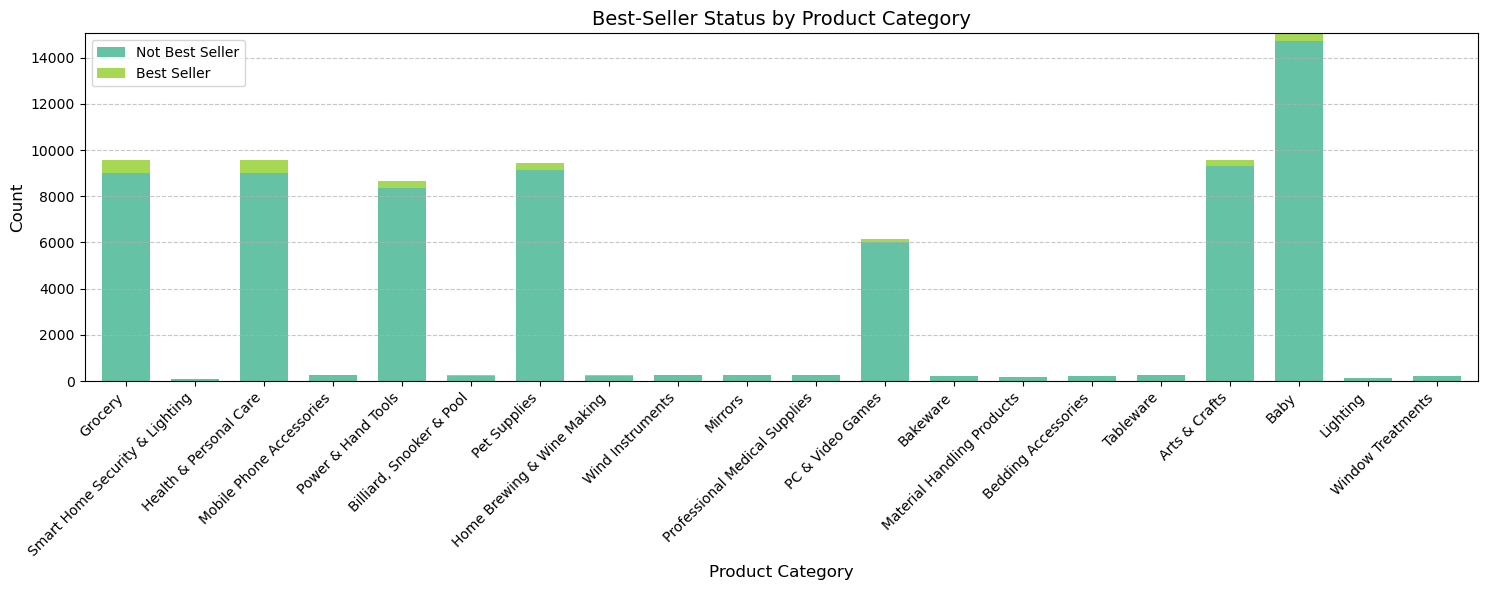

In [100]:
import matplotlib.pyplot as plt

# Increase figure size for better readability
fig, ax = plt.subplots(figsize=(15, 6))

# Plot stacked bar chart
#crosstab_result_new.head(20).plot(kind="bar", stacked=True, colormap="Set2", width=0.7, ax=ax)
sorted_crosstab.head(20).plot(kind="bar", stacked=True, colormap="Set2", width=0.7, ax=ax)
# Improve labels and layout
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Best-Seller Status by Product Category", fontsize=14)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.legend(title="", labels=["Not Best Seller", "Best Seller"])
plt.grid(axis="y", linestyle="--", alpha=0.7)  
plt.tight_layout()  
# Show the plot
plt.show()


### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*



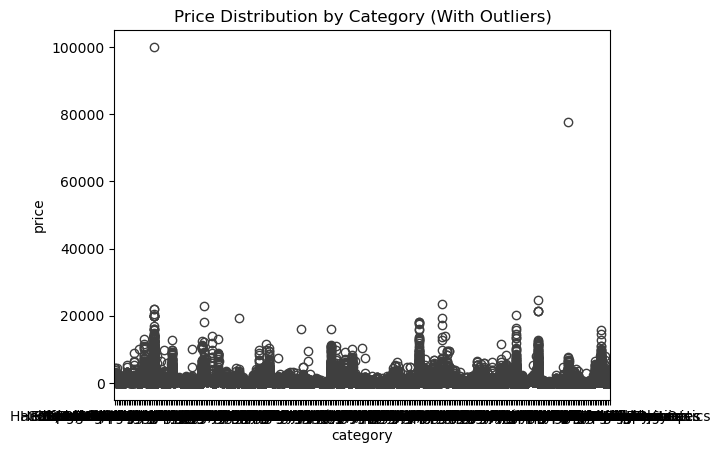

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="category", y="price", data=df)
plt.title("Price Distribution by Category (With Outliers)")
plt.show()

In [123]:
#remove outliers.
def remove_outliers_iqr(df, column="price"):
    def iqr_filter(sub_df):
        Q1 = sub_df[column].quantile(0.25)
        Q3 = sub_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return sub_df[(sub_df[column] >= lower_bound) & (sub_df[column] <= upper_bound)]
    
    return df.groupby("category", group_keys=False).apply(iqr_filter)

# Remove outliers
df_cleaned = remove_outliers_iqr(df)



/var/folders/45/31xssp812hb_0pfhz6ffjqrc0000gn/T/ipykernel_18979/1786906226.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby("category", group_keys=False).apply(iqr_filter)


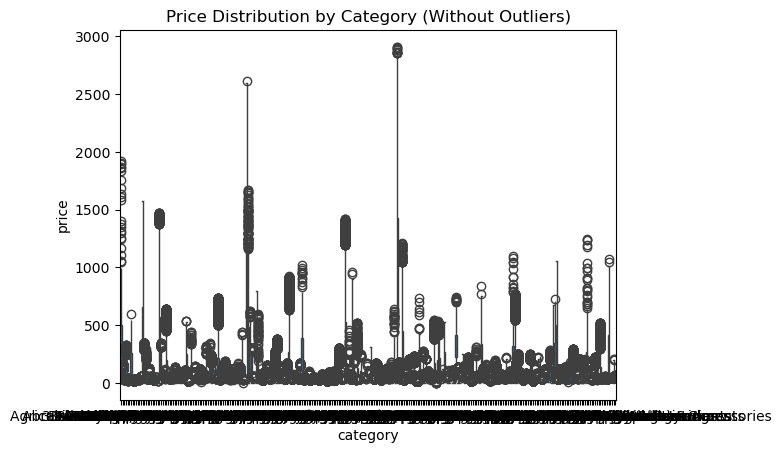

In [121]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="category", y="price", data=df_cleaned)
plt.title("Price Distribution by Category (Without Outliers)")
plt.show()

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.


1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

In [159]:
df_cleaned_grouped=df_cleaned.groupby('category')['price'].count()
top_20_category=df_cleaned_grouped.sort_values(ascending=False).head(20)
type(top_20_category)

pandas.core.series.Series

In [161]:
top_20_category_list = top_20_category.index.tolist()
top_20_category_list

['Sports & Outdoors',
 'Bath & Body',
 'Beauty',
 'Handmade Clothing, Shoes & Accessories',
 'Skin Care',
 'Hair Care',
 'Manicure & Pedicure Products',
 'Fragrances',
 'Make-up',
 'Birthday Gifts',
 'Handmade Kitchen & Dining',
 'Handmade Gifts',
 'Handmade Home Décor',
 'Handmade Jewellery',
 'Handmade Artwork',
 'Luggage and travel gear',
 'Women',
 'Handmade Home & Kitchen Products',
 'Men',
 'Baby']

In [169]:
# for top 20 category
df_new = df_cleaned[df_cleaned['category'].isin(top_20_category_list)]

df_new

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
1158699,1280237,B071944V6V,Baby & Toddler Happy Nappy Reusable Swim Nappy,4.7,14311,11.00,True,200,Baby
1158700,1280238,B013K1WKZ8,Unisex Kids Puddle Iv All-in-One Suit,4.7,8821,9.95,True,100,Baby
1158701,1280239,B07P5H3ZFT,Warm In One Wetsuit,4.7,3911,24.99,False,100,Baby
1158702,1280240,B081H2T5PC,Athletic Crew Grip Socks - Cozy Warm Winter So...,4.6,11735,6.79,True,400,Baby
1158703,1280241,B00JKKHBTO,Eco by Naty Nappy Pants - Hypoallergenic and C...,4.5,3619,32.00,False,400,Baby
...,...,...,...,...,...,...,...,...,...
2182193,2527738,B0BQ33RFCV,Chiffon Scarfs for Women Lightweight Ladies Sc...,4.3,22,6.88,False,0,Women
2182194,2527739,B0B5RGH69D,2 Pairs Stick On Bra Sticky Backless Strapless...,3.2,70,3.99,False,50,Women
2182195,2527740,B0996D1JQ7,! Pairables Bee Designs Womens Slippers Super ...,4.2,42,10.54,False,0,Women
2182196,2527741,B07J2K2K53,Womens Lace Up Ankle Boots Chunky Grip Sole La...,4.2,880,32.99,False,0,Women


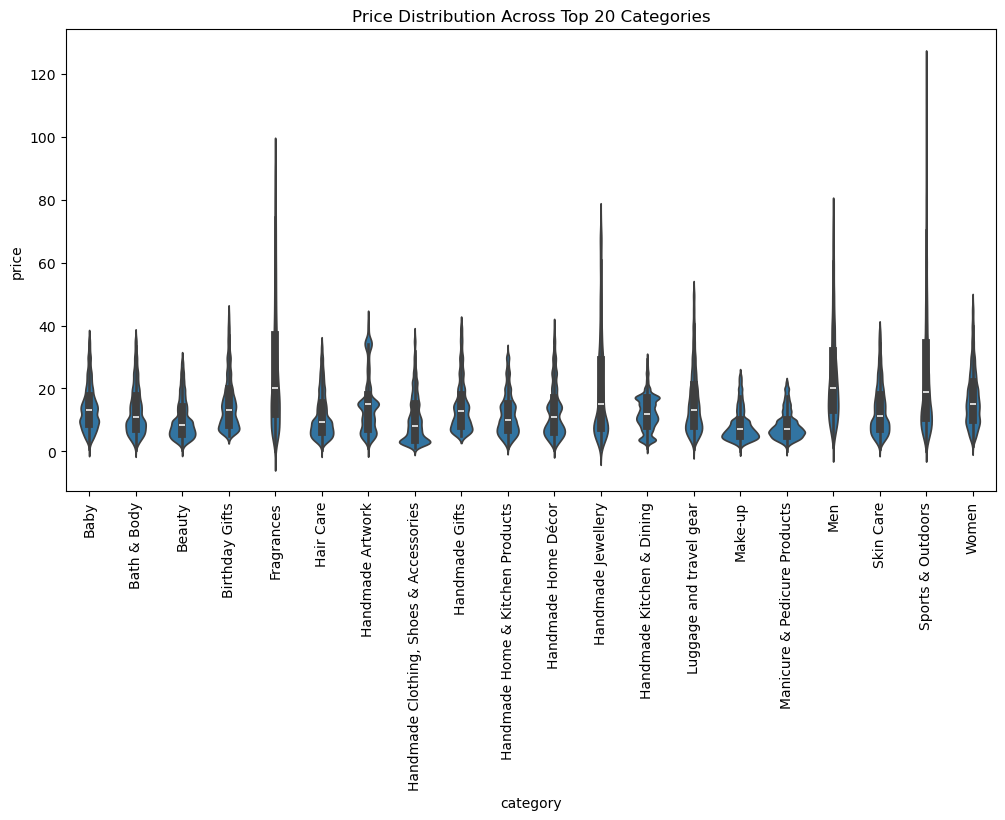

In [171]:
# Create violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='category', y='price', data=df_new)
plt.xticks(rotation=90)  # Rotate x labels for better visibility
plt.title("Price Distribution Across Top 20 Categories")
plt.show()
plt.show()

In [173]:
#category with highest edian price 
grouped=df_cleaned.groupby('category')['price'].median()
grouped.sort_values(ascending=False).head(1)

category
Laptops    1008.5
Name: price, dtype: float64

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

In [180]:
top_10_category = top_20_category_list[:10]

In [182]:
df_new1 = df_cleaned[df_cleaned['category'].isin(top_10_category)]
df_new1.groupby('category')['price'].mean()

category
Bath & Body                               13.008091
Beauty                                    10.270101
Birthday Gifts                            15.259973
Fragrances                                27.422926
Hair Care                                 11.493069
Handmade Clothing, Shoes & Accessories    10.200183
Make-up                                    8.288178
Manicure & Pedicure Products               8.376610
Skin Care                                 13.517747
Sports & Outdoors                         27.216485
Name: price, dtype: float64

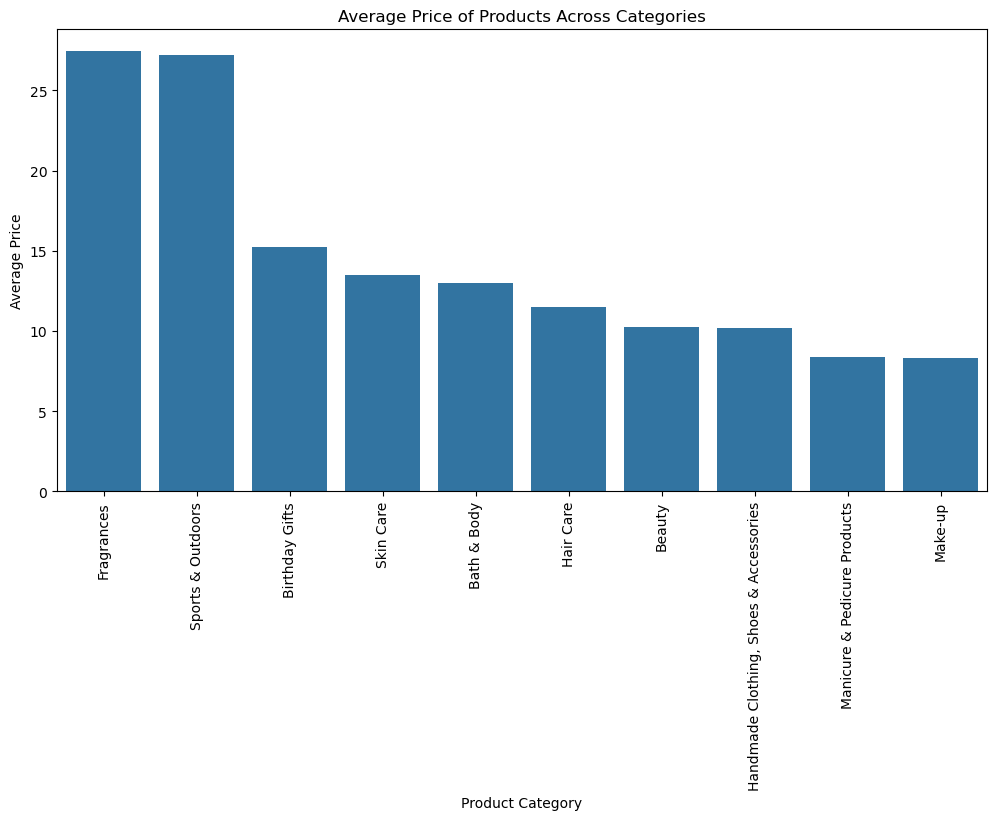

In [184]:
avg_price_per_category = df_new1.groupby('category')['price'].mean().sort_values(ascending=False)

# Create bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_per_category.index, y=avg_price_per_category.values)
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.xlabel("Product Category")
plt.ylabel("Average Price")
plt.title("Average Price of Products Across Categories")
plt.show()

In [186]:
df_new2=df_cleaned.groupby('category')['price'].mean().sort_values(ascending=False)
df_new2.head(1)

category
Laptops    1003.005307
Name: price, dtype: float64

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [193]:
df_new1

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
612773,660873,B00KIY4JE6,Mitchum Women Triple Odor Defense 48HR Protect...,4.7,5260,3.14,False,9000,Bath & Body
612774,660874,B0013G35KW,Bio-Oil Skincare Oil - Improve the Appearance ...,4.7,45931,12.73,True,8000,Bath & Body
612775,660875,B07CHPWFXK,CeraVe Moisturising Cream for Dry to Very Dry ...,4.6,50201,13.60,True,10000,Bath & Body
612776,660876,B077YSLPTX,"NIVEA Soft Moisturising Cream (500ml), A Moist...",4.7,11098,5.10,False,8000,Bath & Body
612777,660877,B0013G89OY,"Aloe Pura, Organic Aloe Vera Gel, Natural, Veg...",4.5,10466,2.29,False,7000,Bath & Body
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


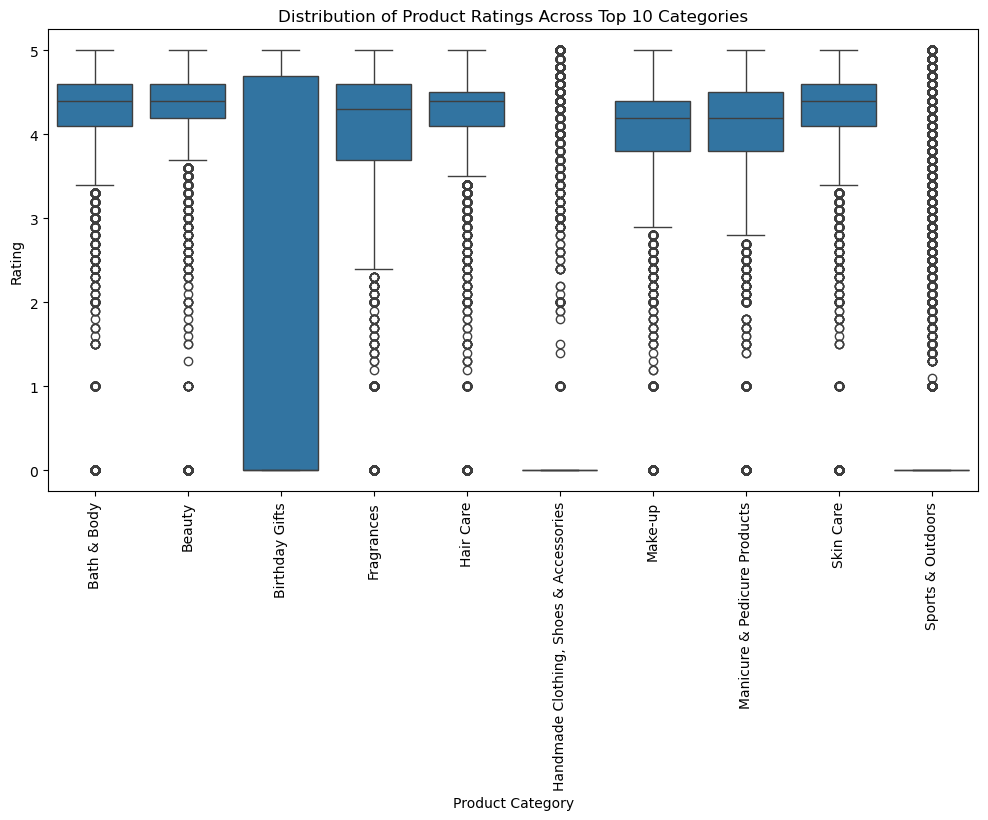

In [201]:
#Box plot for top 10 categories

plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='stars', data=df_new1)
plt.xticks(rotation=90)
plt.xlabel("Product Category")
plt.ylabel("Rating")
plt.title("Distribution of Product Ratings Across Top 10 Categories")
plt.show()


In [203]:
df_new3=df_cleaned.groupby('category')['stars'].median().sort_values(ascending=False)
df_new3.head(1)

category
Computer Memory    4.65
Name: stars, dtype: float64

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
	
2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 


In [216]:
# Calculating the Pearson correlation coefficient between 'price' and 'stars' columns
correlation_p = df['price'].corr(df['stars'])
correlation_p

np.float64(-0.12490673262148386)

In [218]:
# Calculating the Spearman rank correlation between 'price' and 'stars'
correlation_s = df['price'].corr(df['stars'], method='spearman')
correlation_s

np.float64(-0.13316425462433876)

In [220]:
print(f" Pearson correlation {correlation_p} ")
print(f" Spearman correlation {correlation_s} ")


 Pearson correlation -0.12490673262148386 
 Spearman correlation -0.13316425462433876 


Since both correlations are weak and close to zero, price and ratings are mostly independent.
There is a very weak negative relationship between price and ratings.

In [ ]:
#Visualizations

<Figure size 1000x600 with 0 Axes>

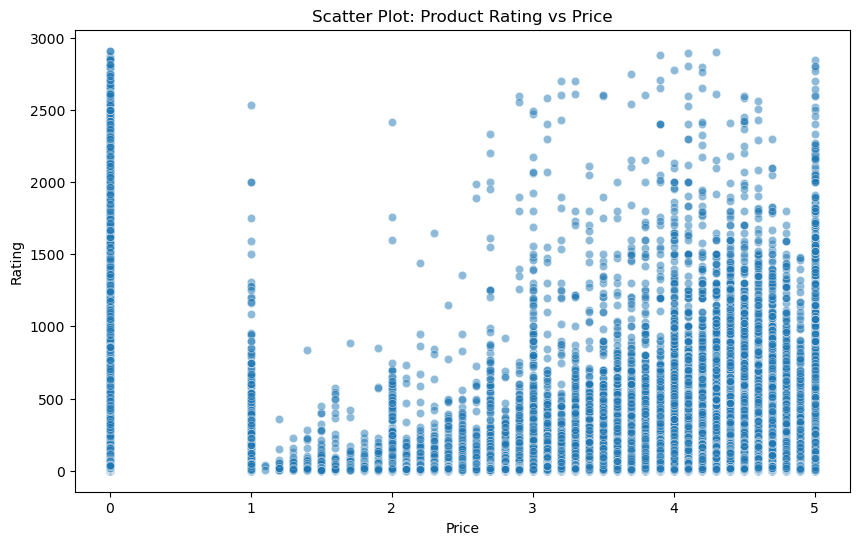

In [227]:
# Scatter Plot: Relationship between Price and Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(y=df_cleaned['price'], x=df_cleaned['stars'], alpha=0.5)
plt.xlabel("Price")
plt.ylabel("Rating")
plt.title("Scatter Plot: Product Rating vs Price")
plt.show()



In [233]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2177532 entries, 332882 to 2325454
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.6+ MB


In [235]:
# Adjusting the numerical dataframe by removing the moved columns

df_numerical = df_cleaned.select_dtypes("number")
df_numerical

,uid,stars,reviews,price,boughtInLastMonth
332882,356687,4.8,46,299.99,100
332883,356688,4.2,1262,139.00,100
332884,356689,4.4,187,164.00,50
332885,356690,4.7,1657,279.99,0
332886,356691,4.3,14767,165.00,0
...,...,...,...,...,...
2325450,2680960,0.0,0,33.67,0
2325451,2680961,0.0,0,37.00,0
2325452,2680962,0.0,0,36.00,0
2325453,2680963,0.0,0,36.00,0


<Figure size 800x600 with 0 Axes>

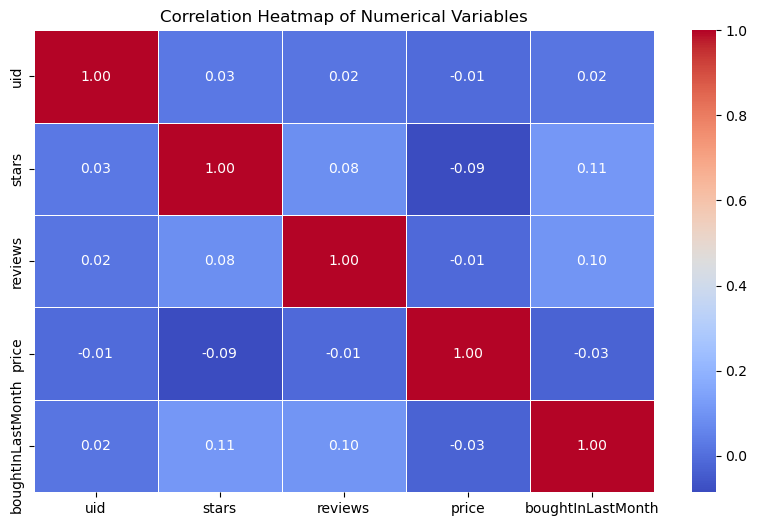

In [239]:
# Correlation Heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(df_numerical.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()



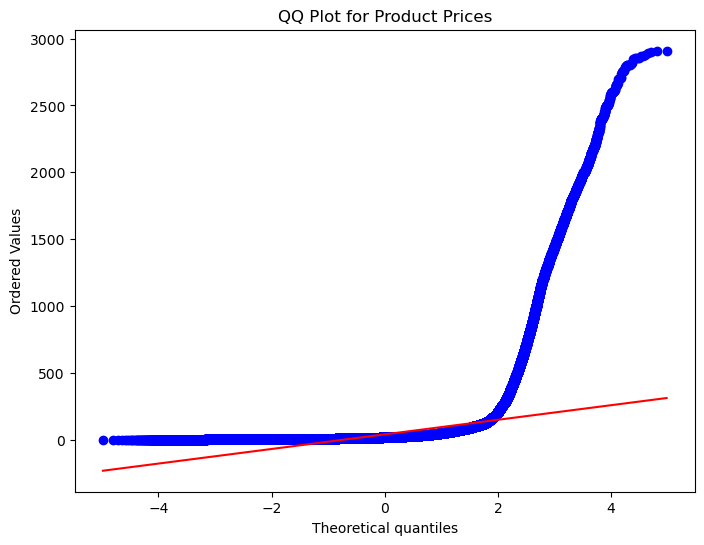

In [241]:
# QQ Plot: Check if Prices Follow a Normal Distribution
import scipy.stats as stats
plt.figure(figsize=(8, 6))
stats.probplot(df_cleaned['price'], dist="norm", plot=plt)
plt.title("QQ Plot for Product Prices")
plt.show()

The price data is not normally distributed; instead, it is right-skewed (long tail on the right).
This suggests that most products have low prices, but a few high-priced products pull the distribution to the right